# Bias correction examples

## Author: Anna Vaughan

In [1]:
import xarray
from matplotlib import pyplot as plt 
from scipy.signal import detrend
import warnings
warnings.filterwarnings('ignore')

## Define function for mean bias correction

In [2]:
def mean_bias_correct(model_data, observations, ref_times, future_times):
    '''
    Mean bias correction
    '''

    # Select reference arrays
    past_model = model_data.sel(time=slice(*ref_times))
    past_obs = observations.sel(time=slice(*ref_times))

    # Select future data to be corrected
    future_model = model_data.sel(time=slice(*future_times))

    # Bias
    past_model_mean = past_model.mean(dim = 'time')
    past_obs_mean = past_obs.mean(dim = 'time')
    bias = past_model_mean - past_obs_mean

    future_bias_corrected = future_model - bias

    return(future_bias_corrected)

## Define function for delta change bias correction

In [3]:
def delta_change_correct(model_data, observations, ref_times, future_times):
    '''
    Delta change correction
    '''

    # Select reference arrays
    past_model = model_data.sel(time=slice(*ref_times))
    past_obs = observations.sel(time=slice(*ref_times))

    # Select future data to be corrected
    future_model = model_data.sel(time=slice(*future_times))

    # Bias
    past_model_mean = past_model.mean(dim = 'time')
    future_model_mean = future_model.mean(dim = 'time')
    diff = future_model_mean - past_model_mean

    obs_bias_corrected = past_obs + diff

    return(obs_bias_corrected)

## Example usage

In [4]:
# Read in data for Beijing
data_folder = '../risa_preprocessing/data/riskindex/netcdf/max_temperature/'

rcp_45_data = xarray.open_dataarray(data_folder + 'Beijing_rcp45.nc')
rcp_85_data = xarray.open_dataarray(data_folder + 'Beijing_rcp85.nc')
obs_data = xarray.open_dataarray(data_folder + 'Beijing_ERAI.nc')

## Mean bias correction example

Reference period = 2000 - 2009 <br/>
Future period = 2030 - 2039

In [10]:
model_data = rcp_45_data
observations = obs_data
ref_times = ('2000-01-01', '2009-12-31')
future_times = ('2030-01-01', '2039-12-31')
model_bias_corrected = mean_bias_correct(model_data, observations, ref_times, future_times)

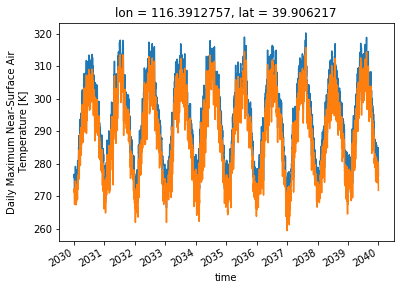

In [12]:
model_bias_corrected.plot()
model_data.sel(time=slice(*future_times)).plot()

In [5]:
# # save bias_corrected data for further enquiries:
# model_data = rcp_45_data
# observations = obs_data
# ref_times = ('2000-01-01', '2009-12-31')

# # save bias_corrected data for further enquiries:
# future_times = ('2010-01-01', '2019-12-31')
# model_bias_corrected = mean_bias_correct(model_data, observations, ref_times, future_times)
# model_bias_corrected.to_netcdf('Beijing_rcp45_MEAN_bias_corr_10s.nc')

# future_times = ('2020-01-01', '2029-12-31')
# model_bias_corrected = mean_bias_correct(model_data, observations, ref_times, future_times)
# model_bias_corrected.to_netcdf('Beijing_rcp45_MEAN_bias_corr_20s.nc')

# future_times = ('2030-01-01', '2039-12-31')
# model_bias_corrected = mean_bias_correct(model_data, observations, ref_times, future_times)
# model_bias_corrected.to_netcdf('Beijing_rcp45_MEAN_bias_corr_30s.nc')

# future_times = ('2040-01-01', '2049-12-31')
# model_bias_corrected = mean_bias_correct(model_data, observations, ref_times, future_times)
# model_bias_corrected.to_netcdf('Beijing_rcp45_MEAN_bias_corr_40s.nc')

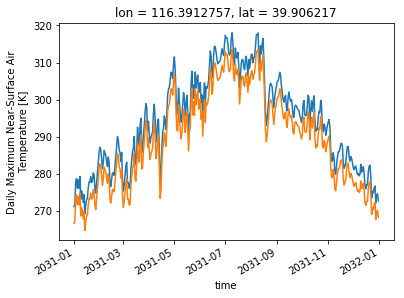

In [21]:
# Plot one year of data
plot_times = ('2031-01-01', '2031-12-31')
model_bias_corrected.sel(time=slice(*plot_times)).plot()
model_data.sel(time=slice(*plot_times)).plot()

## Delta change correction example

Reference period = 2000 - 2009 <br/>
Future period = 2030 - 2039

In [22]:
model_data = rcp_45_data
observations = obs_data
ref_times = ('2000-01-01', '2009-12-31')
future_times = ('2030-01-01', '2039-12-31')

obs_bias_corrected = delta_change_correct(model_data, observations, ref_times, future_times)

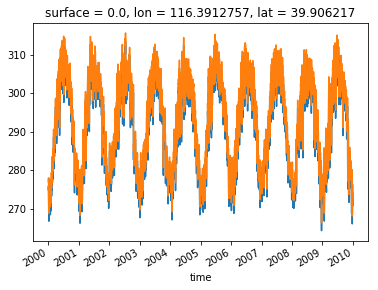

In [23]:
observations.sel(time=slice(*ref_times)).plot()
obs_bias_corrected.plot()

In [24]:
# save bias_corrected data for further enquiries:
obs_bias_corrected.to_netcdf('Beijing_obs_DELTA_bias_corr.nc')